<a href="https://colab.research.google.com/github/TJTomas/DSPS_TTomaszewski/blob/main/HW4/KS_earthquakes_instructions_Part_II_Tomaszewski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [4]:
#all the imports I needed
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
#%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


The Kolmogorov-Smirnov test (K-S test) is used to test weather two or more samples/subsets came from a single set/distribution.

The K-S test's null hypothesis is that the distribution being tested came from the existeing distrubtion being tested against.

    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


The statistic that the test uses is the distance (how simmilar the two distrivutions are) between the sample and the function being tested against.




    3 What does the probability distribution of this statistic depend on?
    
   


The probability distribution that the K-S test depends on is the cdf of the reference distribution.

    

# PART I:  Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards? **NO** Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/DSPS_FBianco/tree/main/data takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [5]:
#your code here...
eqdata = pd.read_csv("https://raw.githubusercontent.com/TJTomas/DSPS_TTomaszewski/refs/heads/main/HW3/earthquakes_TTomaszewski.csv", sep="\s+")

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3411441624.py:2: SyntaxWarning: invalid escape sequence '\s'
  eqdata = pd.read_csv("https://raw.githubusercontent.com/TJTomas/DSPS_TTomaszewski/refs/heads/main/HW3/earthquakes_TTomaszewski.csv", sep="\s+")


running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [6]:
#note: the number of columns may be different depending on how you read the data in. The number of ROWs MUST be the same
eqdata.shape #also note: in class we used a different name for the dataframe

(70798, 13)

In [7]:
eqdata.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,19:38:19.79,eq,l,2.13,c,33.963,-116.290,2.7,C,28553,40,49


In [8]:
eqdata.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,70798.000000,70798.000000,70798.00000,70798.000000,7.079800e+04,70798.000000,70798.000000
mean,2.417826,33.977749,-116.88145,5.707677,3.699163e+06,30.424376,175.725049
std,0.407683,1.156586,1.07667,3.842620,3.495378e+06,22.374143,226.196774
min,2.000000,30.094830,-121.76000,0.000000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.061000,-117.69200,3.100000,7.380962e+05,15.000000,59.000000
50%,2.300000,34.056750,-116.59000,5.300000,3.049477e+06,24.000000,111.000000
75%,2.590000,34.591000,-116.25100,6.900000,3.325926e+06,39.000000,211.000000
max,7.100000,37.985500,-113.71900,29.300000,3.736673e+07,406.000000,3815.000000


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [9]:
# your code here...
eqdata = eqdata[['#YYY/MM/DD', 'HH:mm:SS.ss', 'MAG']]
eqdata.rename({'#YYY/MM/DD' : 'date', 'HH:mm:SS.ss' : "time", 'MAG' : "mag"}, axis = 1, inplace = True) # This makes a dictionary
eqdata.describe()

,mag
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


In [10]:
eqdata.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [11]:
eqdata.describe()

,mag
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now?
- *Right now the time and date columns are strings, indicated by the fact we read them in as strings and the type O by the following code indicates it as a string.*

What type you want them to be to convert them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

- *We want to convert them to datetime objects instead of string objects.*

In [12]:
 eqdata.time.dtype, eqdata.date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [13]:
# your code here
for i in eqdata.index:
  if (eqdata.loc[i, "time"].endswith("60.00")):
    print(eqdata.loc[i, "time"])
    eqdata.loc[i, "time"] = eqdata.loc[i, "time"][:6] + "59.99"
    print(eqdata.loc[i, "time"])

eqdata['datetime'] = eqdata["date"] + " " + eqdata["time"]
eqdata['newdatetime'] = eqdata['datetime'].map(pd.to_datetime)
eqdata['datetime']

04:48:60.00
04:48:59.99
14:19:60.00
14:19:59.99
21:48:60.00
21:48:59.99
15:34:60.00
15:34:59.99
06:41:60.00
06:41:59.99


,datetime
0,1984/01/01 01:30:57.52
1,1984/01/01 05:31:34.16
2,1984/01/01 06:59:05.14
3,1984/01/01 11:10:25.29
4,1984/01/01 19:38:19.79
...,...
70793,2002/12/29 19:37:24.56
70794,2002/12/29 20:17:33.40
70795,2002/12/29 20:21:28.73
70796,2002/12/30 21:51:52.55


In [14]:
eqdata.head()

,date,time,mag,datetime,newdatetime
0,1984/01/01,01:30:57.52,2.02,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790


## select valuable data
Starting here is stuff we did not do together in class but is part of the homework due on 9/17


Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [15]:
eqdata.newdatetime.dtype, eqdata.datetime.dtype

(dtype('<M8[ns]'), dtype('O'))

In [16]:
# your code here:

##THIS CODE WAS PULLED FROM HERE: https://github.com/fedhere/DSPS_FBianco/blob/main/HW3/Corral2018_selectStationary.py

#this are snippits of code. This is not intended as a script that should run on its own.

# first I create the timetamps pairs for the beginning and end of the valid periods.
# I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning

############
# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5),
          (1990.3, 1992.1),
          (1994.6, 1995.6),
          (1996.1,1996.5),
          (1997,1997.6),
          (1997.75,1998.15),
          (1998.25,1999.35),
          (2000.55,2000.8),
          (2000.9 ,2001.25),
          (2001.6 ,2002),
          (2002.5 ,2003)]:

    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime.
    ss.append((pd.to_datetime(int(t[0]), format="%Y")
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y")
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))


############

print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))


############
# data between start and end of first time period
gooddates = (((eqdata.newdatetime >= ss[0][0]) * (eqdata.newdatetime <= ss[0][1])) +\
        # data between start and end of second time period
        ((eqdata.newdatetime >=ss [1][0]) * (eqdata.newdatetime <= ss[1][1])) +\
        ((eqdata.newdatetime >=ss [2][0]) * (eqdata.newdatetime <= ss[2][1])) +\
        ((eqdata.newdatetime >=ss [3][0]) * (eqdata.newdatetime <= ss[3][1])) +\
        ((eqdata.newdatetime >=ss [4][0]) * (eqdata.newdatetime <= ss[4][1])) +\
        ((eqdata.newdatetime >=ss [5][0]) * (eqdata.newdatetime <= ss[5][1])) +\
        ((eqdata.newdatetime >=ss [6][0]) * (eqdata.newdatetime <= ss[6][1])) +\
        ((eqdata.newdatetime >=ss [7][0]) * (eqdata.newdatetime <= ss[7][1])) +\
        ((eqdata.newdatetime >=ss [8][0]) * (eqdata.newdatetime <= ss[8][1])) +\
        ((eqdata.newdatetime >=ss [9][0]) * (eqdata.newdatetime <= ss[9][1])) +\
        # data between start and end of last time period
        ((eqdata.newdatetime >=ss [10][0]) * (eqdata.newdatetime <= ss[10][1])\
        ).values)
gooddates


the 11 timestamp pairs that are the boundaries of good data periods are:


,newdatetime
0,True
1,True
2,True
3,True
4,True
...,...
70793,True
70794,True
70795,True
70796,True


In [17]:
gooddates.head()
#print ("the {} timestamp pairs that are the boundaries of good data periods are:" .format(len(ss)))


,newdatetime
0,True
1,True
2,True
3,True
4,True


In [18]:
print(ss)

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')), (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')), (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')), (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')), (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')), (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')), (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')), (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')), (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')), (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')), (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]


In [19]:
eqdata.head()

,date,time,mag,datetime,newdatetime
0,1984/01/01,01:30:57.52,2.02,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790


The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [20]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chunks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [21]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 18852 earthquakes falling in the selected stationary periods


In [22]:
# your code here: broadcasting to create a dataframe with the good dates only
eqGoodData = eqdata[gooddates]


In [23]:
eqGoodData.shape

(18852, 5)

In [24]:
eqGoodData.head()

,date,time,mag,datetime,newdatetime
0,1984/01/01,01:30:57.52,2.02,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [25]:
# your code here
eqGoodData = eqGoodData[eqGoodData["mag"] > 2]

In [26]:
eqGoodData.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the data

(18027, 5)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (as done in class).


In [27]:
#your code here
eqGoodData["newdatetime"].diff()
eqGoodData["timediff"] = eqGoodData["newdatetime"].diff()
eqGoodData.head()

,date,time,mag,datetime,newdatetime,timediff
0,1984/01/01,01:30:57.52,2.02,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520,NaT
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160,0 days 04:00:36.640000
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140,0 days 01:27:30.980000
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290,0 days 04:11:20.150000
4,1984/01/01,19:38:19.79,2.13,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790,0 days 08:27:54.500000


In [28]:
eqGoodData.shape

(18027, 6)

In [29]:
eqGoodData.head()

,date,time,mag,datetime,newdatetime,timediff
0,1984/01/01,01:30:57.52,2.02,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520,NaT
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160,0 days 04:00:36.640000
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140,0 days 01:27:30.980000
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290,0 days 04:11:20.150000
4,1984/01/01,19:38:19.79,2.13,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790,0 days 08:27:54.500000


In [30]:
eqGoodData.describe()

,mag,newdatetime,timediff
count,18027.000000,18027,18026
mean,2.417771,1992-11-20 04:08:39.405486848,0 days 09:14:18.785768889
min,2.010000,1984-01-01 01:30:57.520000,0 days 00:00:00.170000
25%,2.130000,1985-10-16 08:26:37.935000,0 days 00:47:33.815000
50%,2.300000,1994-08-31 19:40:57.080000,0 days 02:35:42.015000
75%,2.580000,1998-05-04 23:12:50.690000,0 days 06:13:20.580000
max,5.800000,2002-12-30 23:38:49.790000,1388 days 11:06:10.750000
std,0.391684,NaN,13 days 01:35:39.244227378


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [31]:
# your code here
eqGoodData = eqGoodData.drop(index = 0)

In [32]:
eqGoodData.head()

,date,time,mag,datetime,newdatetime,timediff
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160,0 days 04:00:36.640000
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140,0 days 01:27:30.980000
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290,0 days 04:11:20.150000
4,1984/01/01,19:38:19.79,2.13,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790,0 days 08:27:54.500000
5,1984/01/01,19:39:19.67,2.13,1984/01/01 19:39:19.67,1984-01-01 19:39:19.670,0 days 00:00:59.880000


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

Text(0.5, 1.0, 'Histogram of Earthquake Magnitude vs Number of Earthquakes\n*Without* Month Time Deltas Removed')

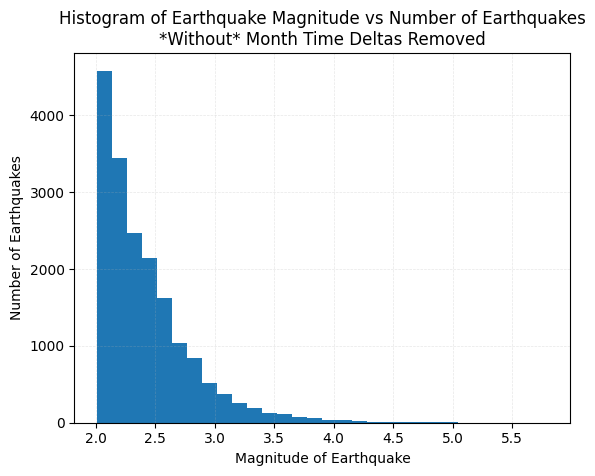

In [33]:
pl.hist(eqGoodData['mag'], bins = 30)
pl.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
pl.xlabel("Magnitude of Earthquake")
pl.ylabel("Number of Earthquakes")
pl.title("Histogram of Earthquake Magnitude vs Number of Earthquakes\n*Without* Month Time Deltas Removed")

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

,date,time,mag,datetime,newdatetime,timediff
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160,0 days 04:00:36.640000
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140,0 days 01:27:30.980000
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290,0 days 04:11:20.150000
4,1984/01/01,19:38:19.79,2.13,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790,0 days 08:27:54.500000
5,1984/01/01,19:39:19.67,2.13,1984/01/01 19:39:19.67,1984-01-01 19:39:19.670,0 days 00:00:59.880000


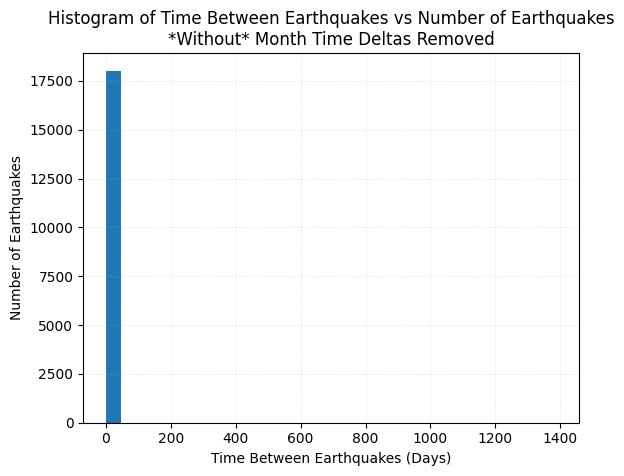

In [34]:
## Example of What the Time Histogram Looks Like with the month gaps.
pl.hist(eqGoodData['timediff'].dt.total_seconds() /60 / 60 /24, bins = 30)
pl.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
pl.xlabel("Time Between Earthquakes (Days)")
pl.ylabel("Number of Earthquakes")
pl.title("Histogram of Time Between Earthquakes vs Number of Earthquakes\n*Without* Month Time Deltas Removed")
eqGoodData.head()

In [35]:
# your code here
# Nanoseconds in a month: 2.628*(10**15)
eqGoodData = eqGoodData[eqGoodData["timediff"] < pd.to_timedelta("30day")]
eqGoodData.shape

(18016, 6)

Text(0.5, 1.0, 'Histogram of Earthquake Magnitude vs Number of Earthquakes\n*With* Month Time Deltas Removed')

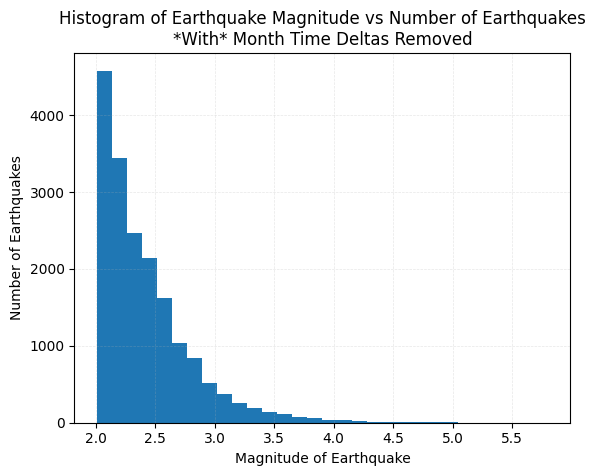

In [36]:
pl.hist(eqGoodData['mag'], bins = 30)
pl.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
pl.xlabel("Magnitude of Earthquake")
pl.ylabel("Number of Earthquakes")
pl.title("Histogram of Earthquake Magnitude vs Number of Earthquakes\n*With* Month Time Deltas Removed")

,date,time,mag,datetime,newdatetime,timediff
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160,0 days 04:00:36.640000
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140,0 days 01:27:30.980000
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290,0 days 04:11:20.150000
4,1984/01/01,19:38:19.79,2.13,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790,0 days 08:27:54.500000
5,1984/01/01,19:39:19.67,2.13,1984/01/01 19:39:19.67,1984-01-01 19:39:19.670,0 days 00:00:59.880000


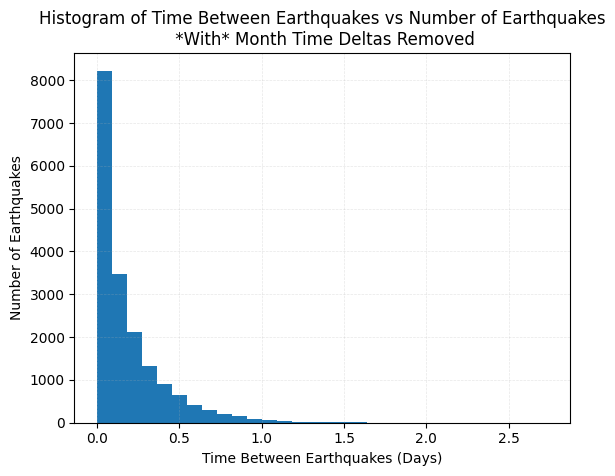

In [37]:
pl.hist(eqGoodData['timediff'].dt.total_seconds() /60 / 60 /24, bins = 30)
pl.grid(True, linestyle = "--", linewidth = 0.5, alpha = 0.3)
pl.xlabel("Time Between Earthquakes (Days)")
pl.ylabel("Number of Earthquakes")
pl.title("Histogram of Time Between Earthquakes vs Number of Earthquakes\n *With* Month Time Deltas Removed")
eqGoodData.head()

In [38]:
eqGoodData.to_csv("eqGoodData", index=False)

# PART II - data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018pseudocodeKStest.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

In [39]:
# your code here
'''
aplha = 0.0027

For threshold 0.01 and 0.001:
  	For all Mk values of M in Corral2018:
		{
		# remove gaps below minimum gap threshold
		x_Mk =  gaps where M > M_k
		For i in [1,2]: # do it twice
			{
			# Rescale the time gaps distribution by the mean value of the time gaps.
			Rk = 1 / mean of x_Mk
			X_Mk = x_Mk * Rk where x_Mk*Rk  > threshold # can be achieved broadcasting in python
			}
		# these two lines of code are not necessary cause Rk~1
		Rk = 1 / mean of x_Mk
		x_Mk = x_Mk * Rk

	For all Mk values of M in Corral2018:
		{
   		For all Ml values of M in Corral2018 greater than Mk
			{
			Perform the KS test on (Mk, Ml)
			}
   		}
'''

'\naplha = 0.0027\n\nFor threshold 0.01 and 0.001:\n  \tFor all Mk values of M in Corral2018:\n\t\t{\n\t\t# remove gaps below minimum gap threshold\n\t\tx_Mk =  gaps where M > M_k\n\t\tFor i in [1,2]: # do it twice\n\t\t\t{\n\t\t\t# Rescale the time gaps distribution by the mean value of the time gaps.\n\t\t\tRk = 1 / mean of x_Mk\n\t\t\tX_Mk = x_Mk * Rk where x_Mk*Rk  > threshold # can be achieved broadcasting in python\n\t\t\t}\n\t\t# these two lines of code are not necessary cause Rk~1\n\t\tRk = 1 / mean of x_Mk\n\t\tx_Mk = x_Mk * Rk\n\n\tFor all Mk values of M in Corral2018:\n\t\t{\n   \t\tFor all Ml values of M in Corral2018 greater than Mk\n\t\t\t{\n\t\t\tPerform the KS test on (Mk, Ml)\n\t\t\t}\n   \t\t}\n'

## The following was my prompt to ChatGPT to generate the code below:

We are trying to recreate figure 1 found in "STATISTICAL TESTS FOR SCALING IN THE INTER-EVENT TIMES OF EARTHQUAKES IN CALIFORNIA" found athttps://arxiv.org/pdf/0910.0055 in python with a pandas data set that includes the following: [Date, time, mag, datetime(string), newdatetime(pandas object), and timediff (the difference in time between earthquakes as a pandas object) ]. The image is also attached.

The following is the exact verbiage to recreate the graph:
1. important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (= α thresold: call your variable alpha) of 3- σ .
2. Follow the instructions (algorithm) in Section 3 paragraph 3 and compare your results with the results in table 1 with a threshold of = 0.01 and 0.001 Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1). Note that the x axis in plot Fig 1 is in log space. Use np.log10() to take the logarithm of the time gaps. The pseudocode for the algorithm is here (It will be at the end of this prompt).
3. Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018.

Use the scipy function for the 2 sample KS test. (resources here to learn about the table syntax in markdown). Psudocode: aplha = 0.0027 For threshold 0.01 and 0.001:
```
# your code here
aplha = 0.0027

For threshold 0.01 and 0.001:
  	For all Mk values of M in Corral2018:
		{
		# remove gaps below minimum gap threshold
		x_Mk =  gaps where M > M_k
		For i in [1,2]: # do it twice
			{
			# Rescale the time gaps distribution by the mean value of the time gaps.
			Rk = 1 / mean of x_Mk
			X_Mk = x_Mk * Rk where x_Mk*Rk  > threshold # can be achieved broadcasting in python
			}
		# these two lines of code are not necessary cause Rk~1
		Rk = 1 / mean of x_Mk
		x_Mk = x_Mk * Rk

	For all Mk values of M in Corral2018:
		{
   		For all Ml values of M in Corral2018 greater than Mk
			{
			Perform the KS test on (Mk, Ml)
			}
   		}

```
This psudocode has some holes, but we were able to figure out that in order to create our graph we need to first normalize our data (create X_Mk) with Mk and Ml which are both lists of modified timediff with different thresholds. We need to also need to modify some portion of our code to put it in log_10 space, but we're not sure where. Also the KS test that we use is sp.stats.ks_2samp(x,y).



## We asked one additional prompt for formatting an output, which is as follows:

Finally, are you able to modify the code from above for the code to explicitly state if there was a statistically significant difference?

## Below is the outputted working code with modifications:


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
aplha = 0.0027

def compute_rescaled_gaps(gaps, m_cutoff):
    """Given a 1D numpy array `gaps`, compute R = 1/mean, rescale, then drop x < m_cutoff."""
    gaps = np.asarray(gaps, dtype=float)
    # drop non-positive (if any)
    gaps = gaps[gaps > 0]
    R = 1.0 / np.mean(gaps)
    x = gaps * R
    # filter
    x = x[x >= m_cutoff]
    return x, R

def empirical_cdf(arr):
    """Return sorted arr and cdf values P(x) = fraction ≤ x."""
    arr_sorted = np.sort(arr)
    N = len(arr_sorted)
    cdf = np.arange(1, N+1) / N  # or (i)/N
    return arr_sorted, cdf

def test_and_plot_scaling(df, Mks, m_cutoffs=[0.01, 0.001], alpha=0.0027):
    # Store results
    results = {}
    fig, axes = plt.subplots(1, len(m_cutoffs), figsize=(6*len(m_cutoffs), 5))
    caption = "Figure 1: Plot of the distributions from earthquake scaling laws. Graphed are the relations of earthquakes with a minimum magnitude threshold using a K-S test for same parent distribution. The two different plots have different significance levels in the earthquake data, and the counts for each minimum earthquake magnitude are also listed."
    if len(m_cutoffs) == 1:
        axes = [axes]
    for j, m in enumerate(m_cutoffs):
        axes[j].set_xscale('log')
        axes[j].set_xlabel(r' x ≡ $R_{s}τ$ (dimensionless)')
        axes[j].set_ylabel('P(x) (dimensionless)')
        axes[j].set_title(f'Statistical Tests for Earthquake Magnitude Scaling with m = {m}')
        results[m] = {}
        # compute x_k for each M_k
        x_by_M = {}
        N_by_M = {}
        for Mk in Mks:
            dfk = df[df['mag'] >= Mk]
            # convert timediff to numeric (e.g. in days or seconds)
            gaps = dfk['timediff'].dt.total_seconds().values
            xk, Rk = compute_rescaled_gaps(gaps, m)
            x_by_M[Mk] = xk
            N_by_M[Mk] = len(xk)
            # plot CDF
            xs, cdf = empirical_cdf(xk)
            axes[j].plot(xs, cdf, label=f'M ≥ {Mk} (N={len(xk)})')
        axes[j].legend()
        axes[j].grid(True)

        # KS tests
        results[m]['d'] = {}
        results[m]['p'] = {}
        # for each pair
        for i, Mk in enumerate(Mks):
            for j2, Ml in enumerate(Mks):
                if Ml <= Mk:
                    continue
                xi = x_by_M[Mk]
                xj = x_by_M[Ml]
                if len(xi) < 2 or len(xj) < 2:
                    d, p = np.nan, np.nan
                else:
                    d, p = ks_2samp(xi, xj)
                results[m]['d'][(Mk, Ml)] = d
                results[m]['p'][(Mk, Ml)] = p
                #print("For ", results[m])
                #print('Statistical Significant Difference: ', p < aplha)
                #print("\n")
    plt.tight_layout()
    plt.figtext(0.5,-0.08,caption,ha="center",wrap=True);


    # Example magnitude thresholds (should match your earlier values)
    Mks = [2.0, 2.5, 3.0, 3.5, 4.0]

    # Example alpha (3-sigma level)
    alpha = 0.0027

    # Define result storage
    results = {
        0.01: {'d': {}, 'p': {}, 'sig': {}},
        0.001: {'d': {}, 'p': {}, 'sig': {}}
    }

    for threshold in [0.01, 0.001]:
        gap_dict = {}

        # Step 1: For each magnitude threshold, prepare rescaled gap data
        for Mk in Mks:
            dfk = df[df['mag'] >= Mk].copy()

            # Convert timediff to seconds
            gaps = dfk['timediff'].dt.total_seconds().values

            # Two-pass filtering and rescaling
            for _ in range(2):
                Rk = 1 / np.mean(gaps)
                gaps = gaps * Rk
                gaps = gaps[gaps > threshold]

            # Final rescaling (redundant, as noted)
            Rk = 1 / np.mean(gaps)
            gaps = gaps * Rk

            gap_dict[Mk] = gaps

        # Step 2: KS test between all (Mk, Ml) with Ml > Mk
        for i, Mk in enumerate(Mks):
            for Ml in Mks[i+1:]:
                x = gap_dict[Mk]
                y = gap_dict[Ml]

                d_stat, p_value = stats.ks_2samp(x, y)

                # Store results
                results[threshold]['d'][(Mk, Ml)] = d_stat
                results[threshold]['p'][(Mk, Ml)] = p_value
                results[threshold]['sig'][(Mk, Ml)] = p_value < alpha

                # Report significance
                if p_value < alpha:
                    print(f"❌ Statistically significant difference found between M ≥ {Mk} and M ≥ {Ml} at threshold = {threshold}.")
                    print(f"    KS statistic: {d_stat:.5f}, p-value: {p_value:.5f} < alpha = {alpha}")
                    print()
                else:
                    print(f"✅ No significant difference between M ≥ {Mk} and M ≥ {Ml} at threshold = {threshold}.")
                    print(f"    KS statistic: {d_stat:.5f}, p-value: {p_value:.5f} ≥ alpha = {alpha}")
                    print()


    return 0
    #return results

✅ No significant difference between M ≥ 2.0 and M ≥ 2.5 at threshold = 0.01.
    KS statistic: 0.01197, p-value: 0.59416 ≥ alpha = 0.0027

✅ No significant difference between M ≥ 2.0 and M ≥ 3.0 at threshold = 0.01.
    KS statistic: 0.02039, p-value: 0.66400 ≥ alpha = 0.0027

✅ No significant difference between M ≥ 2.0 and M ≥ 3.5 at threshold = 0.01.
    KS statistic: 0.06629, p-value: 0.06655 ≥ alpha = 0.0027

✅ No significant difference between M ≥ 2.0 and M ≥ 4.0 at threshold = 0.01.
    KS statistic: 0.11041, p-value: 0.13319 ≥ alpha = 0.0027

✅ No significant difference between M ≥ 2.5 and M ≥ 3.0 at threshold = 0.01.
    KS statistic: 0.01936, p-value: 0.80194 ≥ alpha = 0.0027

✅ No significant difference between M ≥ 2.5 and M ≥ 3.5 at threshold = 0.01.
    KS statistic: 0.05859, p-value: 0.15683 ≥ alpha = 0.0027

✅ No significant difference between M ≥ 2.5 and M ≥ 4.0 at threshold = 0.01.
    KS statistic: 0.10854, p-value: 0.14959 ≥ alpha = 0.0027

✅ No significant difference

0

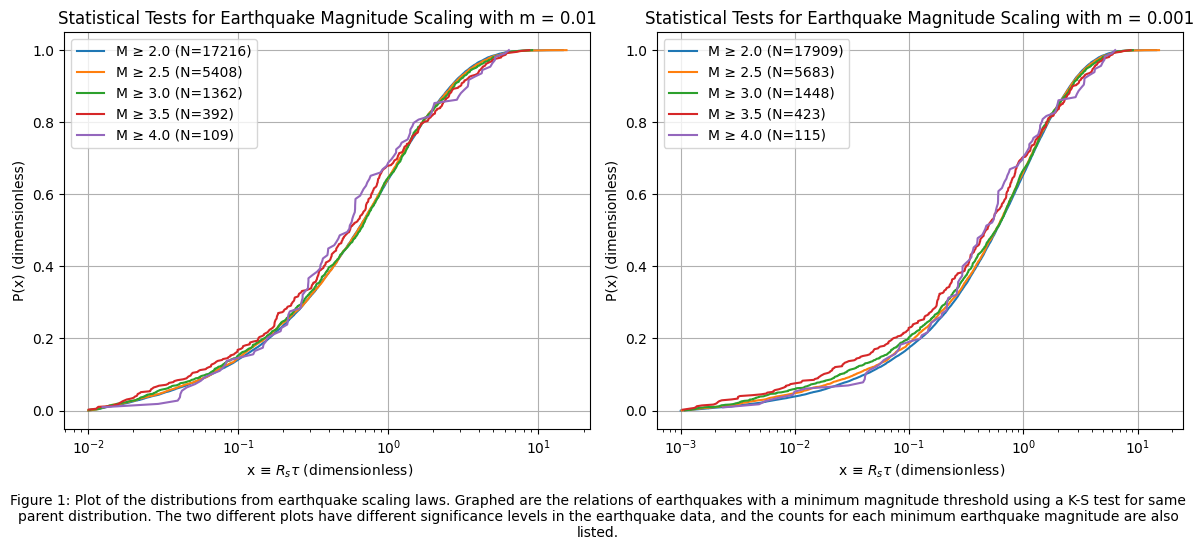

In [75]:
Mks = [2.0, 2.5, 3.0, 3.5, 4.0]
test_and_plot_scaling(eqGoodData, Mks)

your table here:
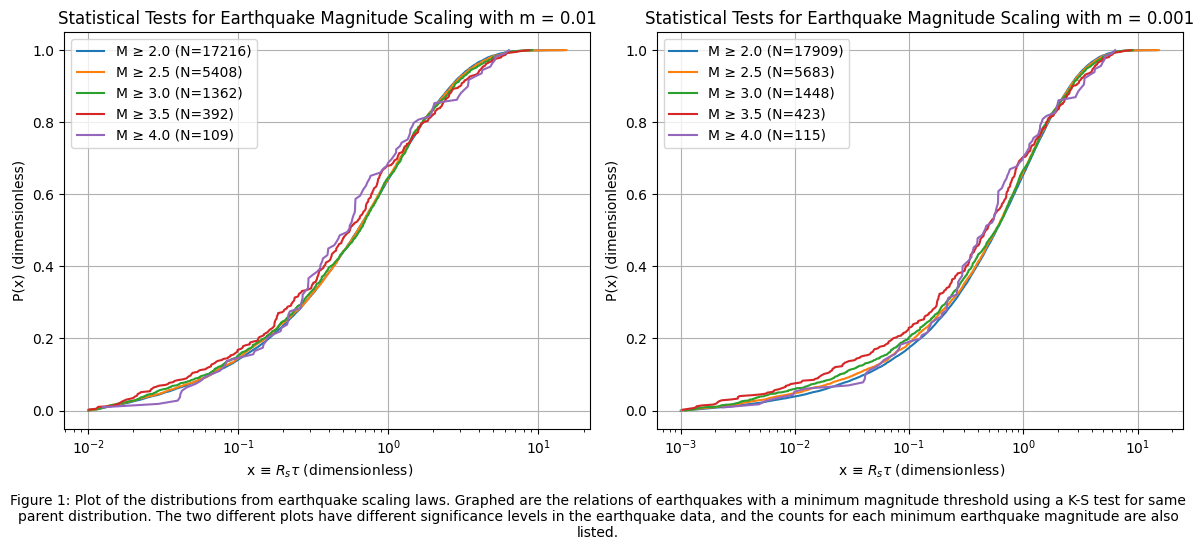

# Table From the Paper
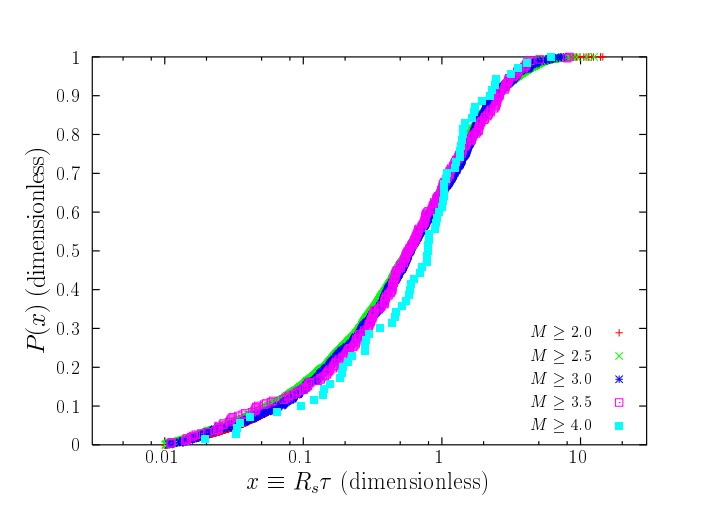

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

# Process:
To determine any statistically significant difference in the distribution of earthquake magnitudes, we need to examine our p-value output relative to the results in Correll. To do this, we broke the earthquake data into five regions based on magnitude, with a minimum magnitude in each group being 2.0, 2.5, 3.0, 3.5, and 4.0 respectively. This splits the data set into seperate distributions to test the scaling laws discussed in Correll. After splitting up the data into these distributions and normalizing their occurence frequency, they were than compared against one another in a K-S test to determine if the data came from the same "distribution", or in our case, if scaling laws applied between their occurence and magnitude.
# Results:
Our graphs are comparable to the results in Correll, both in their tables and their graphs. This means that not only is the results in Correll reproducible with the same data set, but that we can test their null hypothesis directly in whether there is a scaling law between earthquake magnitude and frequnecy of aforementioned magnitude. Based on our results, we can conclude that there is a scaling law between a given magnitude and its frequency, from magnitudes of 2.0 or greater through magnitudes of 4.0 or greater, such that the magnitude of an earthquake and the duration between it and the next earthquake of similar or greater magnitude is proportional to one another.



### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

In [42]:
# your code here

pl.imshow((ks_001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");
#add a caption

NameError: name 'ks_001' is not defined


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

Redoing it for threshold 0001